In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import tweepy, json
from geopy.geocoders import Nominatim

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import re
import string
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import EngineFiles.TweetExtract as te
import EngineFiles.TweetFormat as tf
import EngineFiles.TweetVisualize as tv
import EngineFiles.TweetClean as tc

In [2]:
te.GenerateTweets(max_tweets_data=10000, keyword=['bangsat','agama','tenang','kafir','mantan','jablay','jokowi'])

All tweets already generated!


In [3]:
df = te.GetTweets()
df.to_csv(r'Data/indonesia_Tweet/empty_tweets.csv', index=False, header=True)
df.head(20)

text
1   Aku kenal bf 10 years, tak gaduh, marah, tingg...
2   RT @sacretzr: cewe ikut nongkrong bareng cowo ...
3   Biasanya Jokowi tdk birokratis &amp; formalist...
4   @jokowi Jokowi ngak mau kalah dengan Aceh, beb...
5   RT @msaid_didu: Ayo bersatu selamatkan negeri ...
6                             @edelweisnya ttp tenang
7   RT @mworkji: GURU AGAMA GUE GA JELAS BETUL MAS...
8   1 per 1 Pendukung JOKOWI Dan juga para Penista...
9   RT @msaid_didu: Ayo bersatu selamatkan negeri ...
10  gays gua lg bolos pelajaran agama, gaikut zoom...
11  Pukul empat sore kemarin, saya menerima telepo...
12  Pukul empat sore kemarin, saya menerima telepo...
14  RT @aizadfahmy: Chey Aiman Terpaling Psikologi...
15                 @awandasss Bangtot : bangsat total
16  JOKOWI REKAYASA PENANGKAPAN JOKO CANDRA/DJOKO ...
17                  @Kdaejn Tenang pasukan aq banyak😍
18  Kira - kira ..\nBerapa harga KARTU KEBAL HUKUM...
19             Yah mau gimana lagi gua gak dikangenin
20  @nahdlatululama \n@nahdlatululama_ \n@suaraNU ...
21  RT @aizadfahmy: Chey Aiman Terpaling Psikologi...

In [2]:
df = tf.main_data()

alay_lang = tf.bahasa_slang()
stopword_bahasa = tf.bahasa_stopwords(additional_words=['rt'])

display(df.head())

Tweet       label
0  - disaat semua cowok berusaha melacak perhatia...  hatespeech
1  RT USER: USER siapa yang telat ngasih tau elu?...     abusive
2  41. Kadang aku berfikir, kenapa aku tetap perc...      normal
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...      normal
4  USER USER Kaum cebong kapir udah keliatan dong...  hatespeech

---
# ANALYZING RAW DATA

In [3]:
print(df.info(), end='\n\n')
print(f'Dataset shape: {df.shape[0]} rows and {df.shape[1]} columns', end='\n')
display(df.groupby(['label']).count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   13169 non-null  object
 1   label   13169 non-null  object
dtypes: object(2)
memory usage: 205.9+ KB
None

Dataset shape: 13169 rows and 2 columns


Tweet
label            
abusive      1748
hatespeech   5561
normal       5860

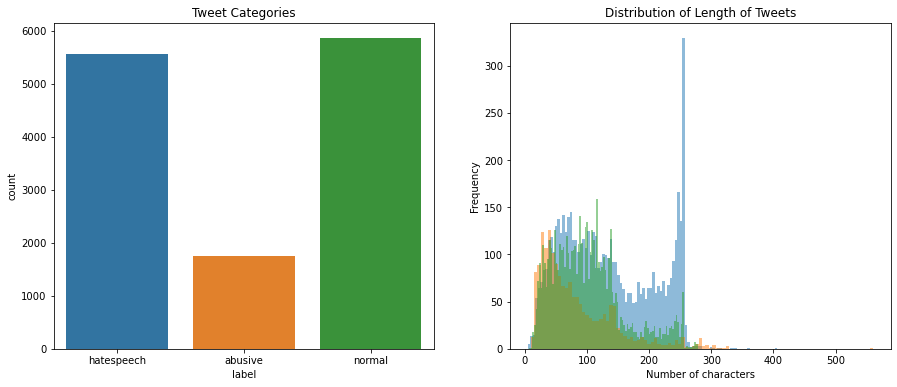

In [4]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
df1 = df[df['label']=='normal']['Tweet'].apply(len)
df2 = df[df['label']=='abusive']['Tweet'].apply(len)
df3 = df[df['label']=='hatespeech']['Tweet'].apply(len)

sns.countplot(x='label', data=df, ax=ax[0])
ax[0].set_title('Tweet Categories')
df1.plot(bins=100, kind='hist', ax=ax[1], alpha=0.5)
df2.plot(bins=100, kind='hist', ax=ax[1], alpha=0.5)
df3.plot(bins=100, kind='hist', ax=ax[1], alpha=0.5)
ax[1].set_title('Distribution of Length of Tweets')
ax[1].set_xlabel('Number of characters')
plt.show()

## Most frequent text appears

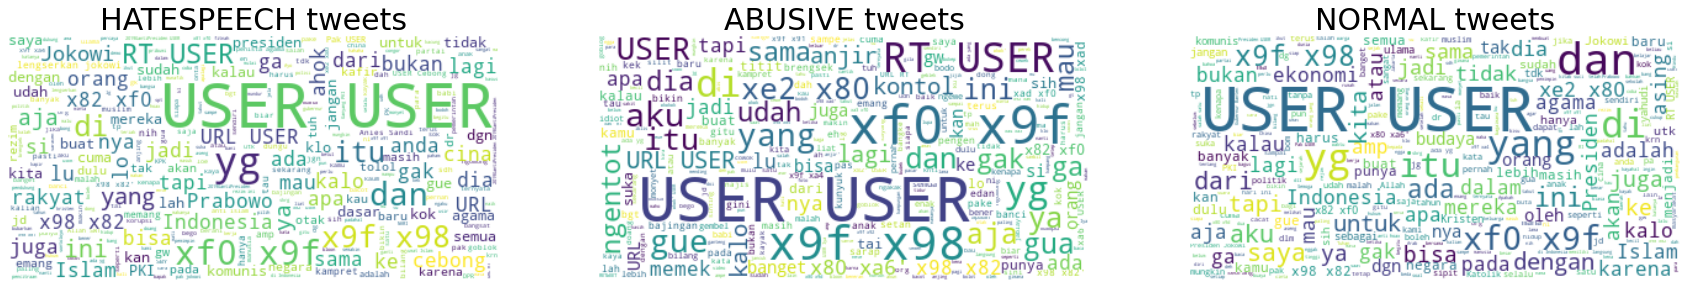

In [5]:
tv.wordcloud_viz(dataframe=df, col_labels='label', labels=['hatespeech', 'abusive', 'normal'], col_target='Tweet')

---
# DATA CLEANING

## Lowering words

In [6]:
test_str = 'HeLLo ev3RyonE!!'
tc.get_low(test_str)

'hello ev3ryone!!'

## Removing punctuation

In [7]:
test_str= ":) Hii, everyone...!!"
tc.del_punc(test_str)

' Hii everyone'

## Removing uncommon words

In [8]:
test_str = '<a>Hi\teveryone, RT @UsEr ple\xf0se click this xf0x9fx98xa link <strong>https://www.bitly.com<strong>\n and http:www.google.com, enjoy you\x98r day</a>'
tc.del_dirty_words(test_str)

'Hi everyone RT UsEr plese click this link s and enjoy your day'

## Replacing *'alay'* words

In [9]:
test_str = 'abisin ajalah biar gak ad lg yg megangin'
tc.replace_alay(test_str, alay_lang)

'habiskan sajalah biar tidak ada lagi yang memegang'

## Stemming words

In [10]:
test_str = 'Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan'
tc.stemming_words(test_str)

'ekonomi indonesia sedang dalam tumbuh yang bangga'

## Removing stopwords

In [11]:
test_str = 'Dengan Menggunakan Python dan Library Sastrawi saya dapat melakukan proses Stopword Removal'
tc.del_stopwords(test_str, stopword_bahasa)

'Dengan Menggunakan Python Library Sastrawi proses Stopword Removal'

## Text Cleaning Pipeline

In [12]:
df['Tweet'] = df['Tweet'].apply(lambda x : tc.text_preprocessing(x, alay_lang, stopword_bahasa))

---
# EXPLORATORY DATA ANALYSIS

## Unigrams

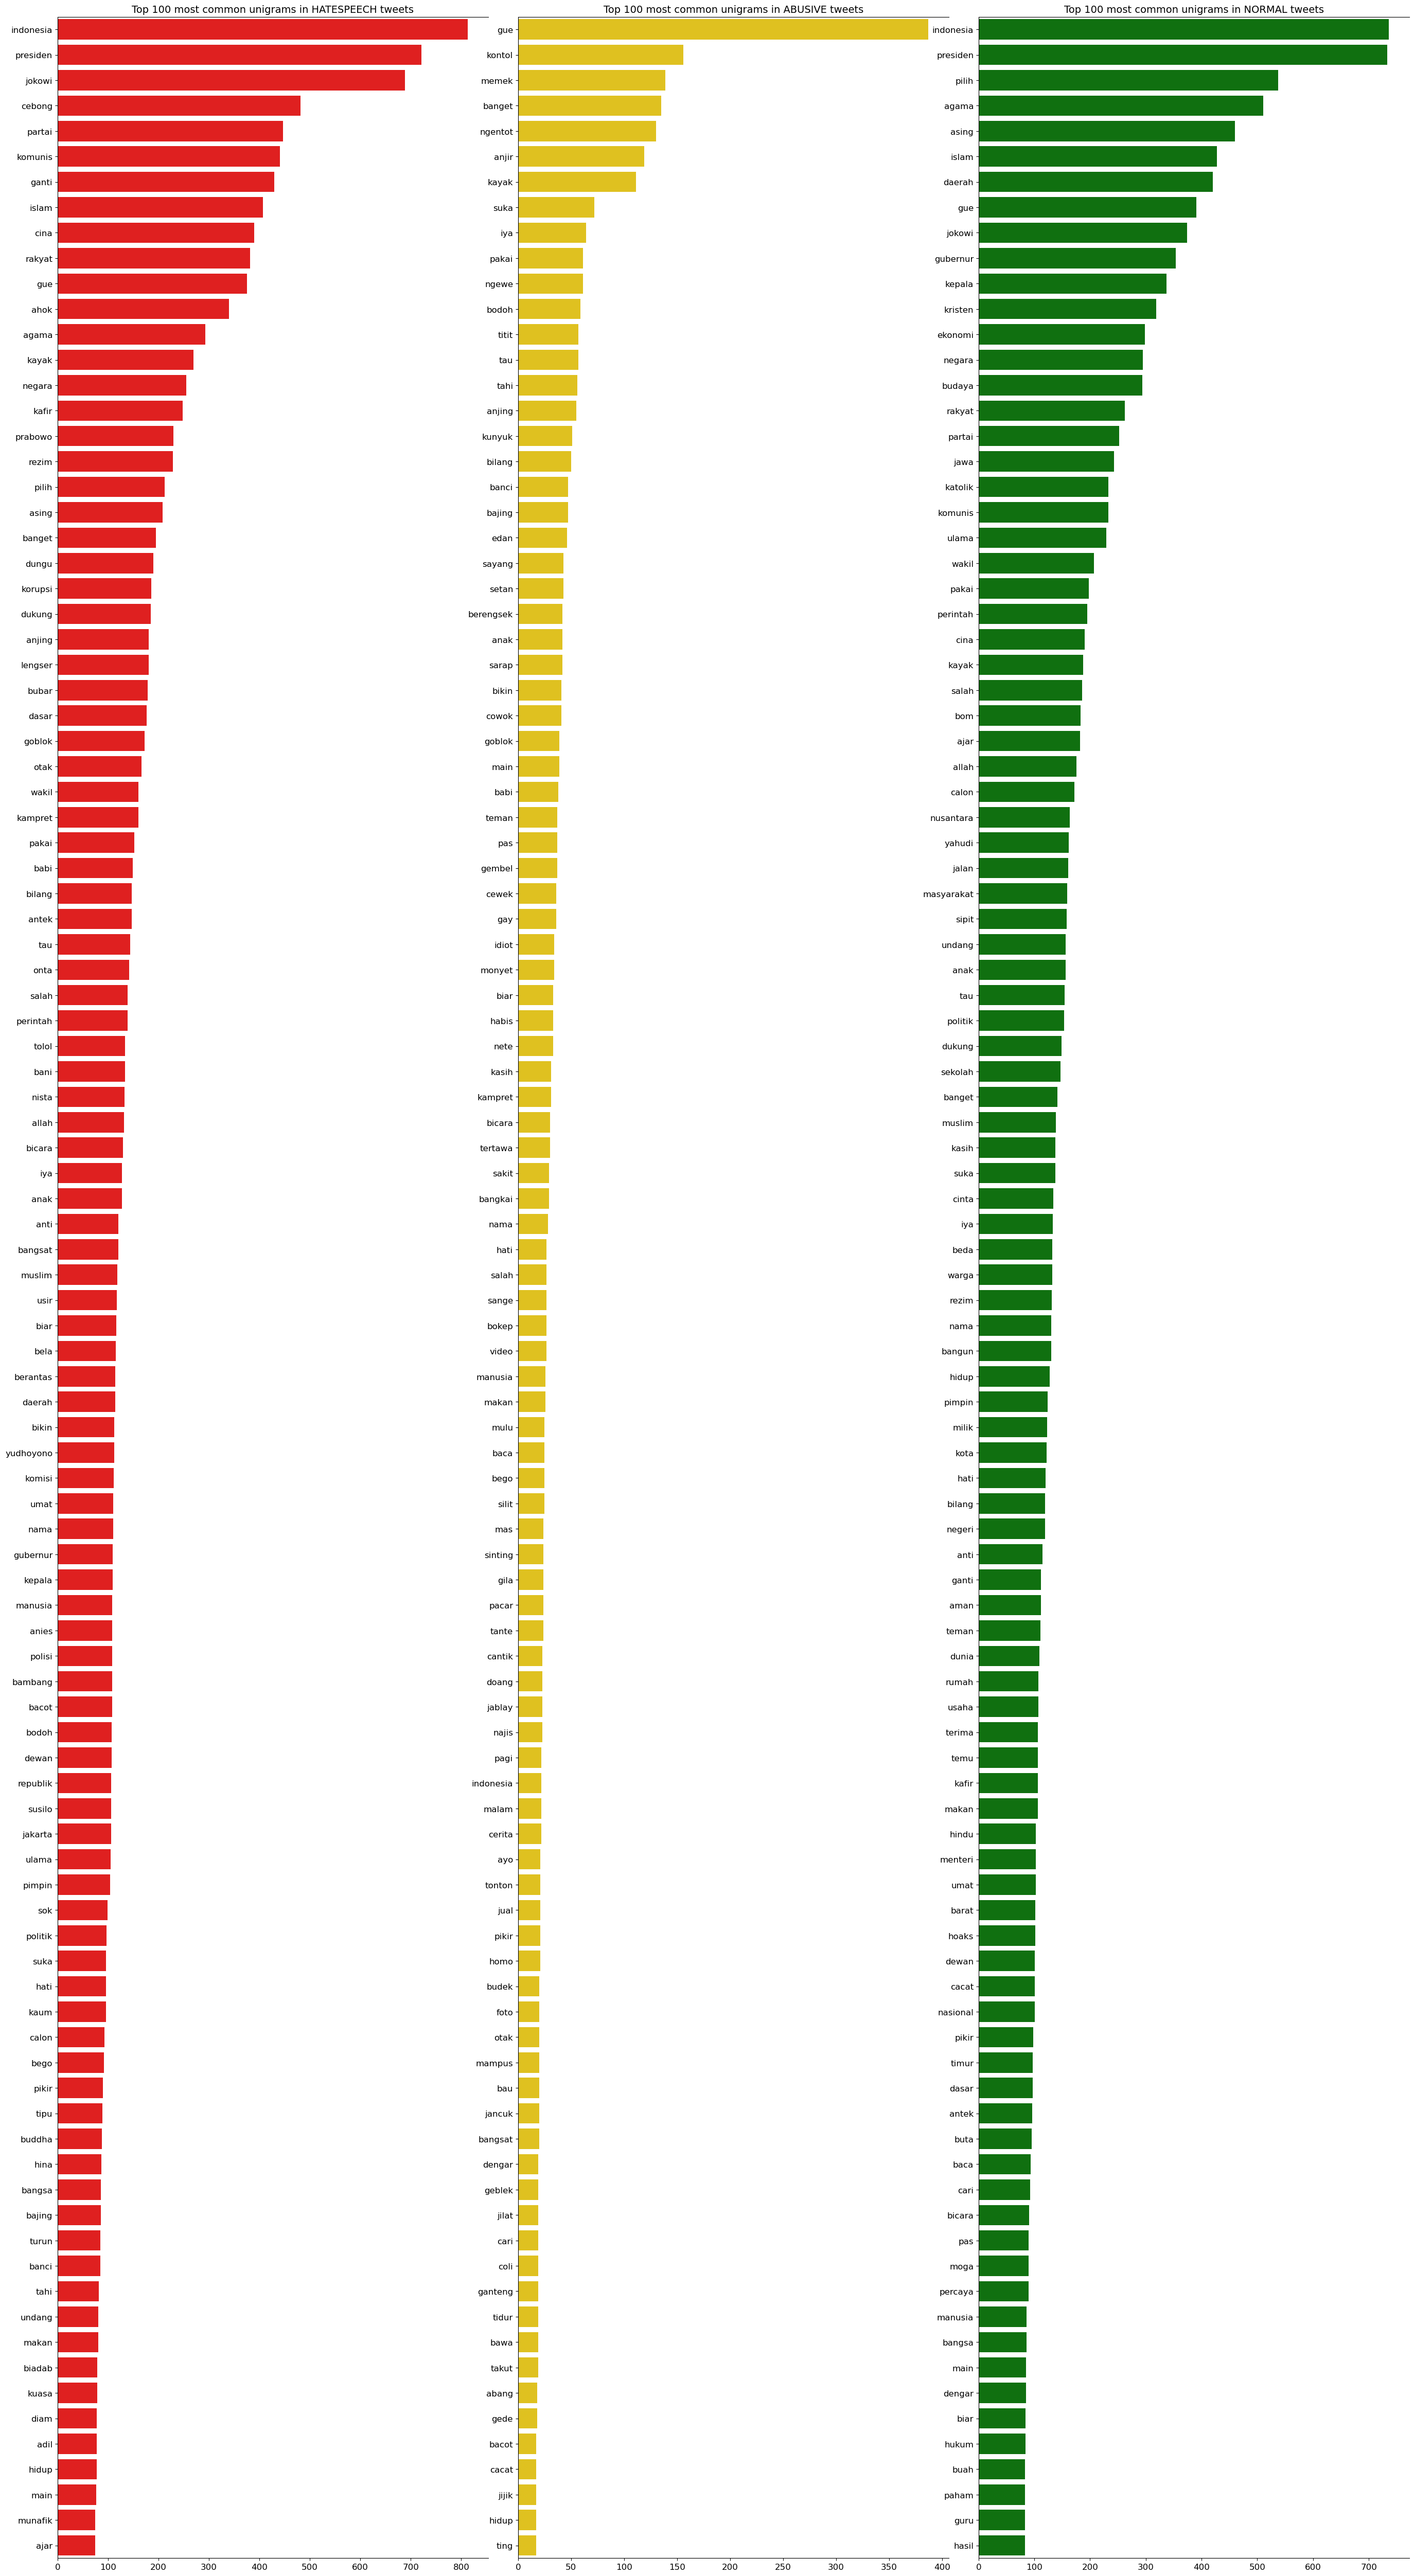

In [14]:
tv.ngrams_viz(dataframe=df, col_labels='label', labels=['hatespeech', 'abusive', 'normal'], col_target='Tweet', ngrams=1, stopwords_list=stopword_bahasa)

## Bigrams

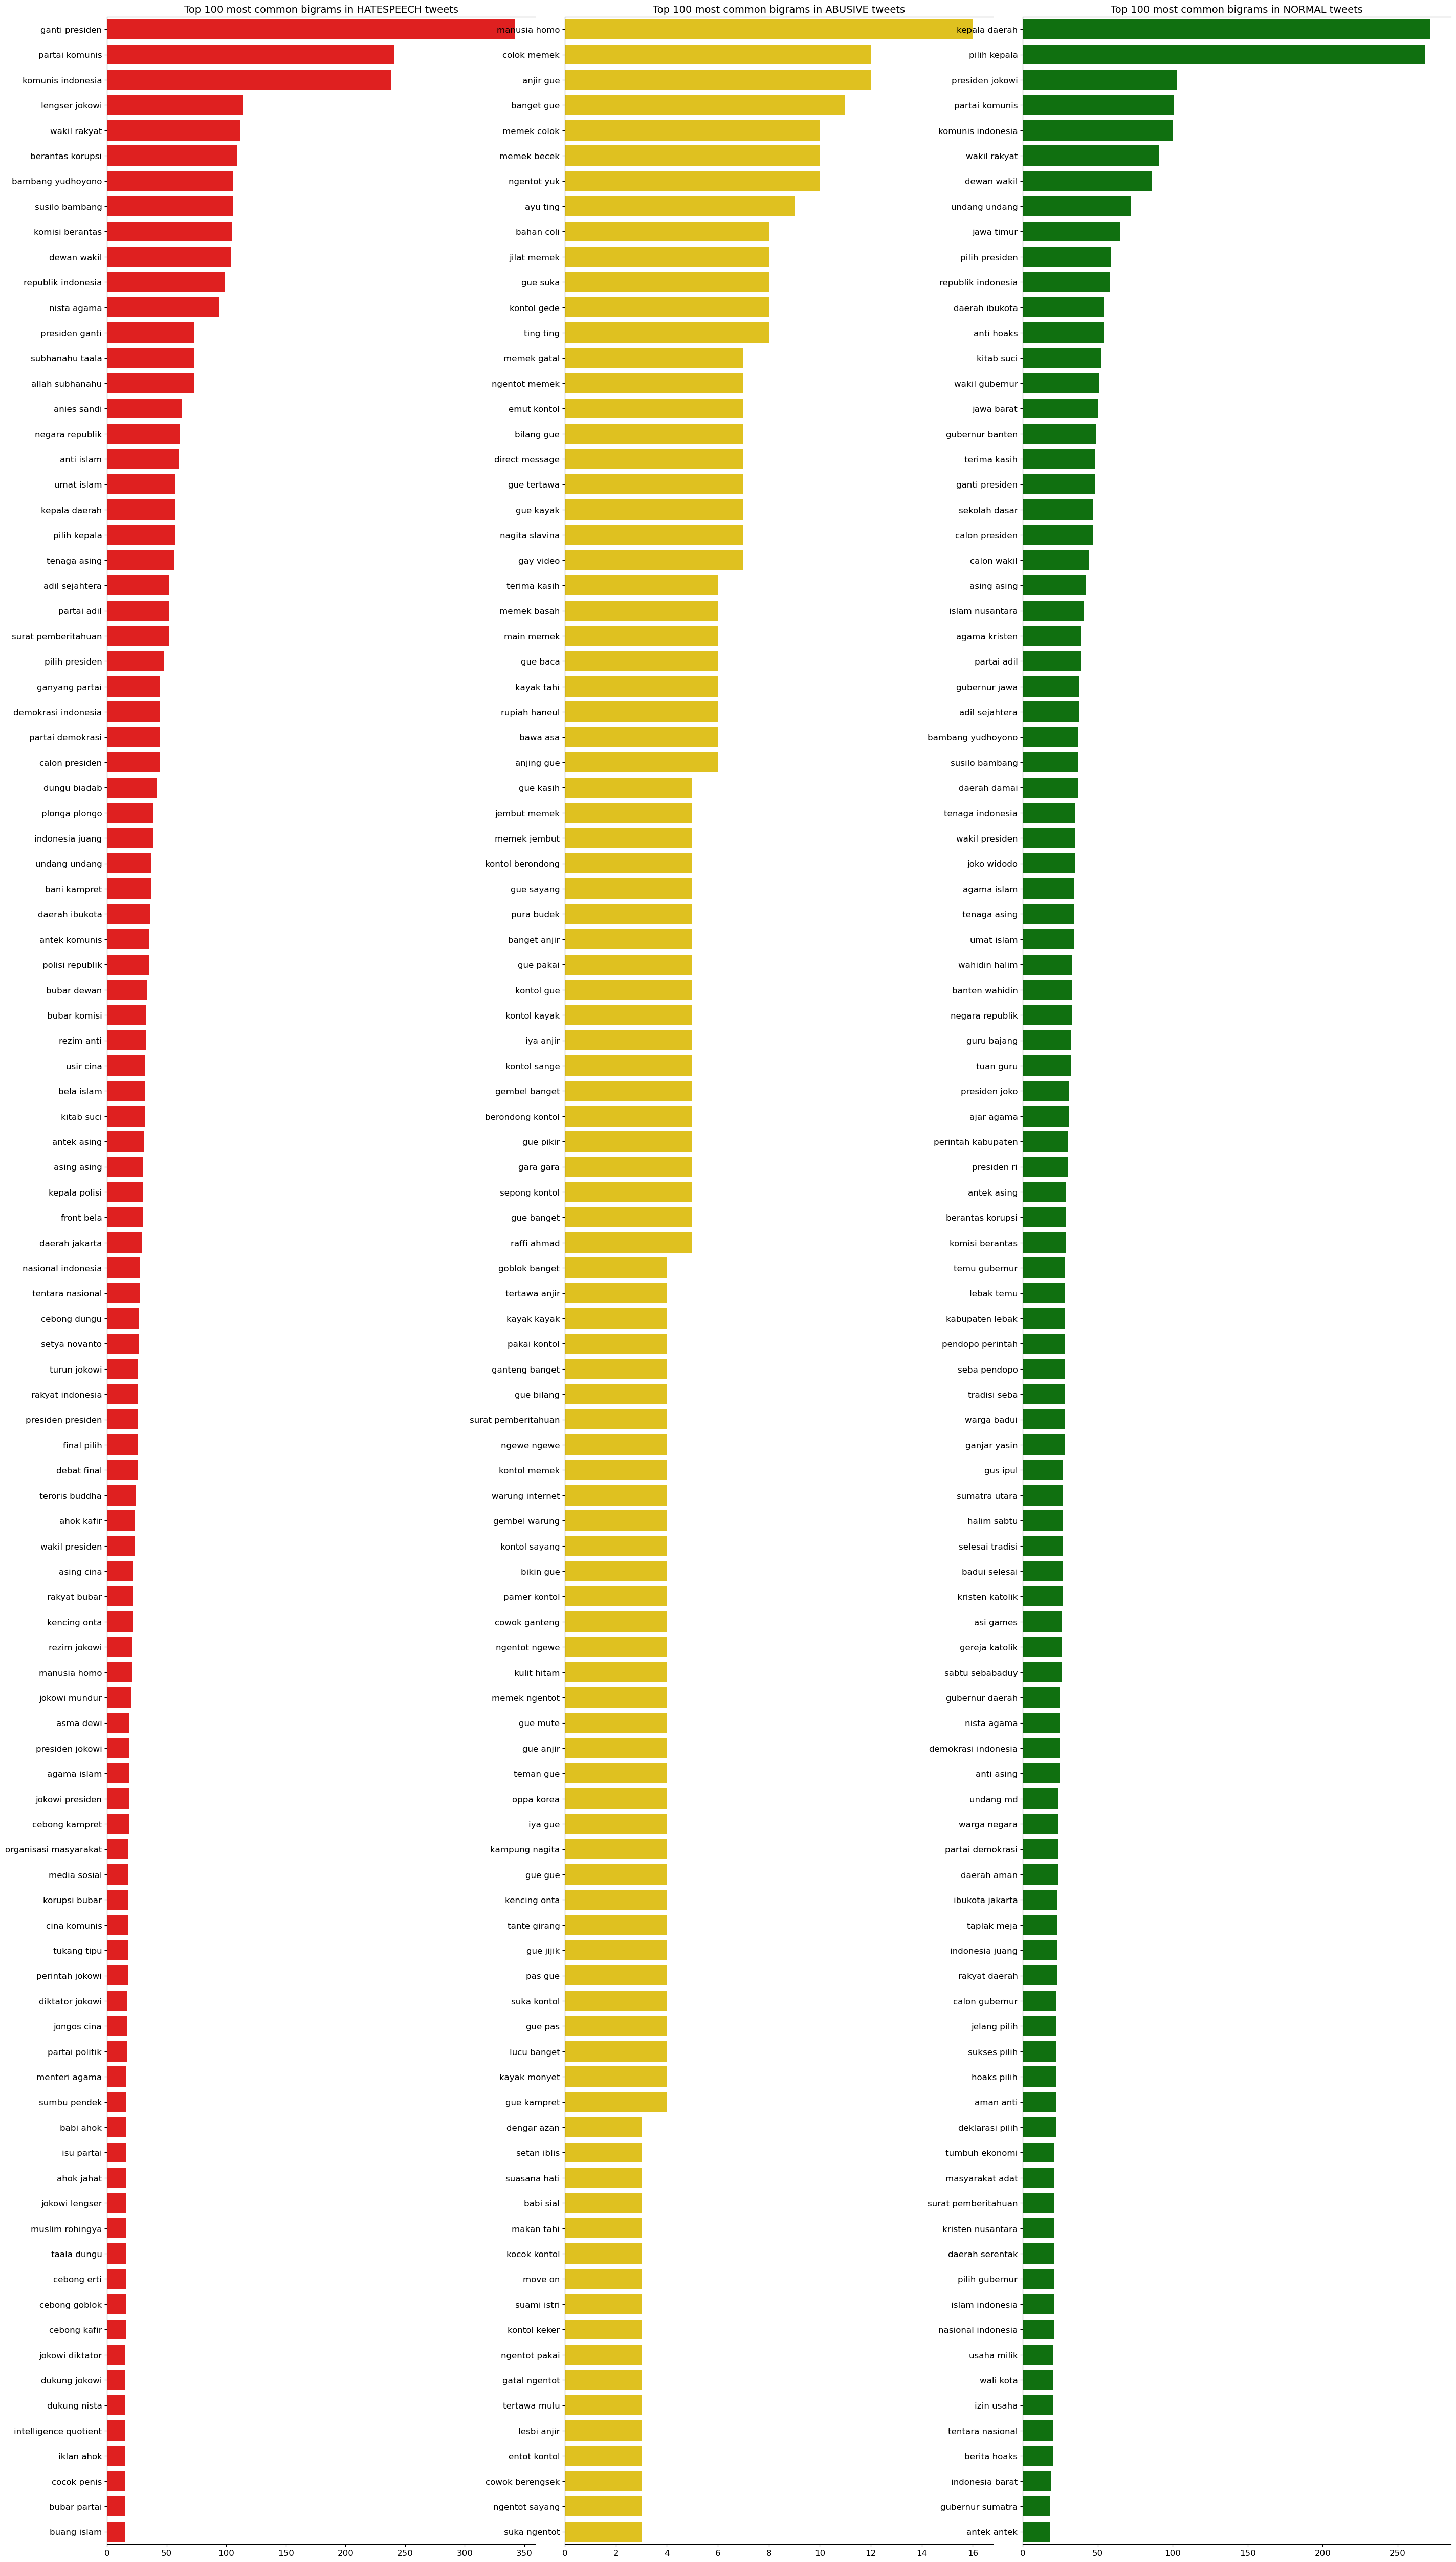

In [15]:
tv.ngrams_viz(dataframe=df, col_labels='label', labels=['hatespeech', 'abusive', 'normal'], col_target='Tweet', ngrams=2, stopwords_list=stopword_bahasa)

## Trigrams

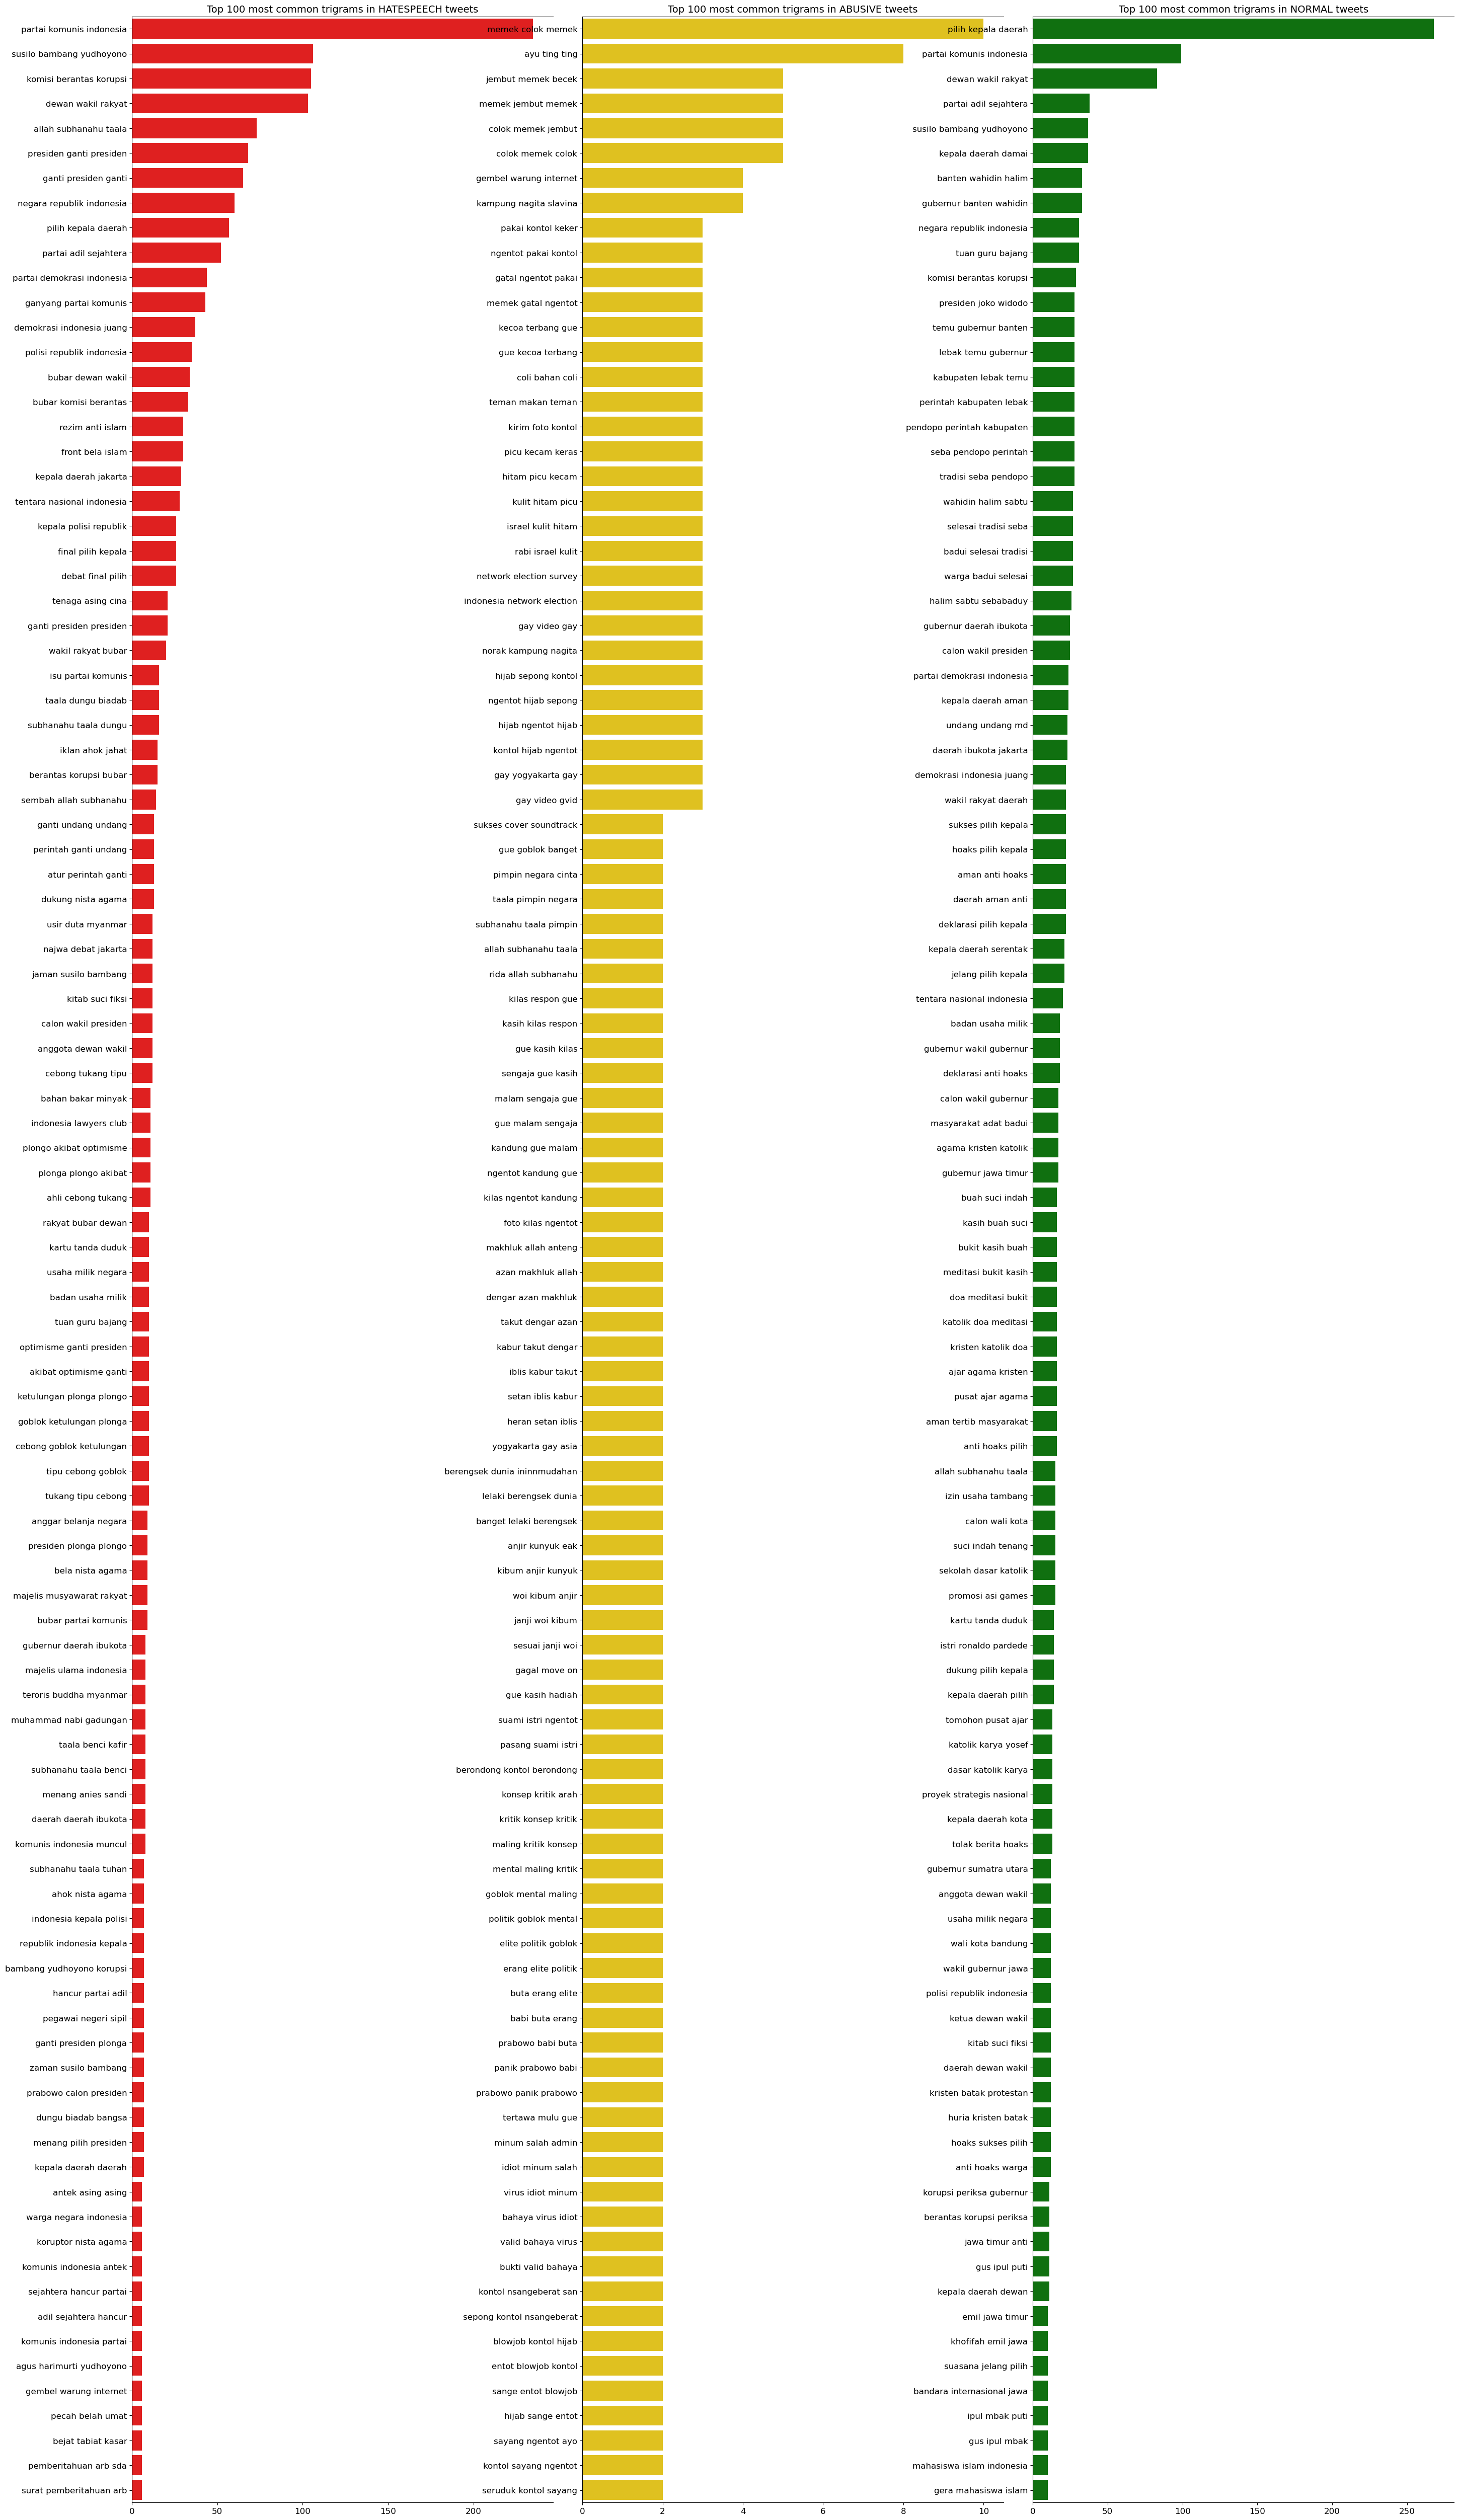

In [16]:
tv.ngrams_viz(dataframe=df, col_labels='label', labels=['hatespeech', 'abusive', 'normal'], col_target='Tweet', ngrams=3, stopwords_list=stopword_bahasa)

## WordCloud

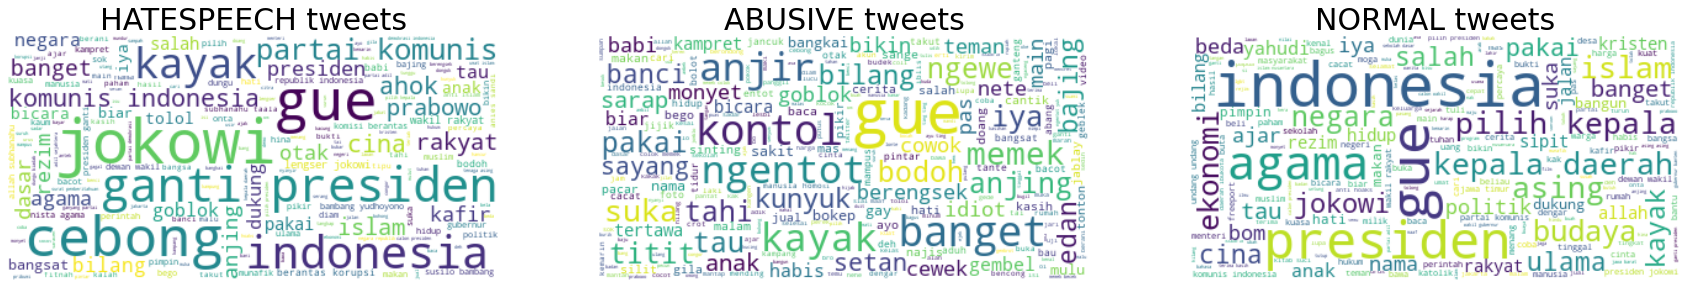

In [13]:
tv.wordcloud_viz(dataframe=df, col_labels='label', labels=['hatespeech', 'abusive', 'normal'], col_target='Tweet')